In [16]:
import sys
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
def get_data(ticker: str, interval: str = '1d', lookback_days: int = 756) -> pd.DataFrame:
    """
    Loads historical market data using yfinance.
    ticker (str): Stock or ETF symbol (e.g., 'SPY')
    interval (str): Data interval ('1d', '1h', '1m', etc.)
    lookback_days (int): Number of trading days to retrieve (capped at 7 if interval is one minute)

    Returns: pd.DataFrame: DataFrame downloaded from yfinance
    """
    if interval in ['1d', '1h']:
        period = str(lookback_days)+"d"
    elif interval == '1m':
        period = "7d"  
    else:
        raise ValueError("Unsupported interval for free data")
    df = yf.download(ticker, period=period, interval=interval, progress=False)
    df.columns = [col[0] if isinstance(col, tuple) else col for col in df.columns]
    df = df.dropna()
    df = df.rename(columns=str.lower)
    df.index.name = 'datetime'

    return df

/var/folders/sk/xk40gf9n2q3bhq2s90436ctr0000gn/T/ipykernel_34457/4255546963.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval, progress=False)


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 756 entries, 2022-08-18 to 2025-08-22
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   close          756 non-null    float64
 1   high           756 non-null    float64
 2   low            756 non-null    float64
 3   open           756 non-null    float64
 4   volume         756 non-null    int64  
 5   days_sequence  756 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 41.3 KB
                 close        high         low        open    volume  \
datetime                                                               
2022-08-18  410.099426  410.789462  407.808782  409.112223  49023200   
2022-08-19  404.588531  407.578805  403.706770  407.310448  68016900   
2022-08-22  396.164001  399.882686  395.253488  399.710148  77695600   
2022-08-23  395.205536  398.147900  394.649634  395.732657  49105200   
2022-08-24  396.470642  397.850744  394.28

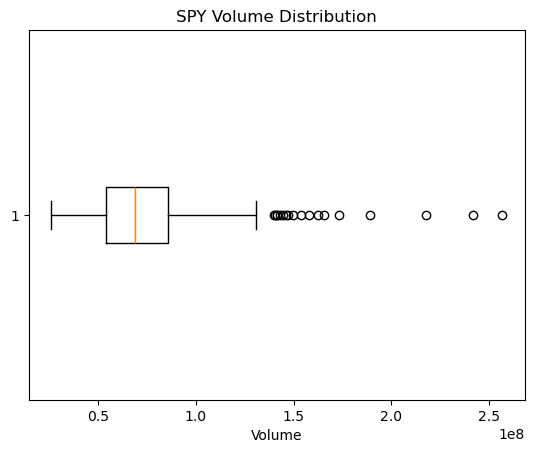

In [18]:
df = get_data("SPY","1d",756)
df['days_sequence'] = range(1, len(df) + 1)
df.info()
print(df.head())
print(df.describe())

plt.boxplot(df['volume'], vert=False)
plt.title('SPY Volume Distribution')
plt.xlabel('Volume')
plt.show()

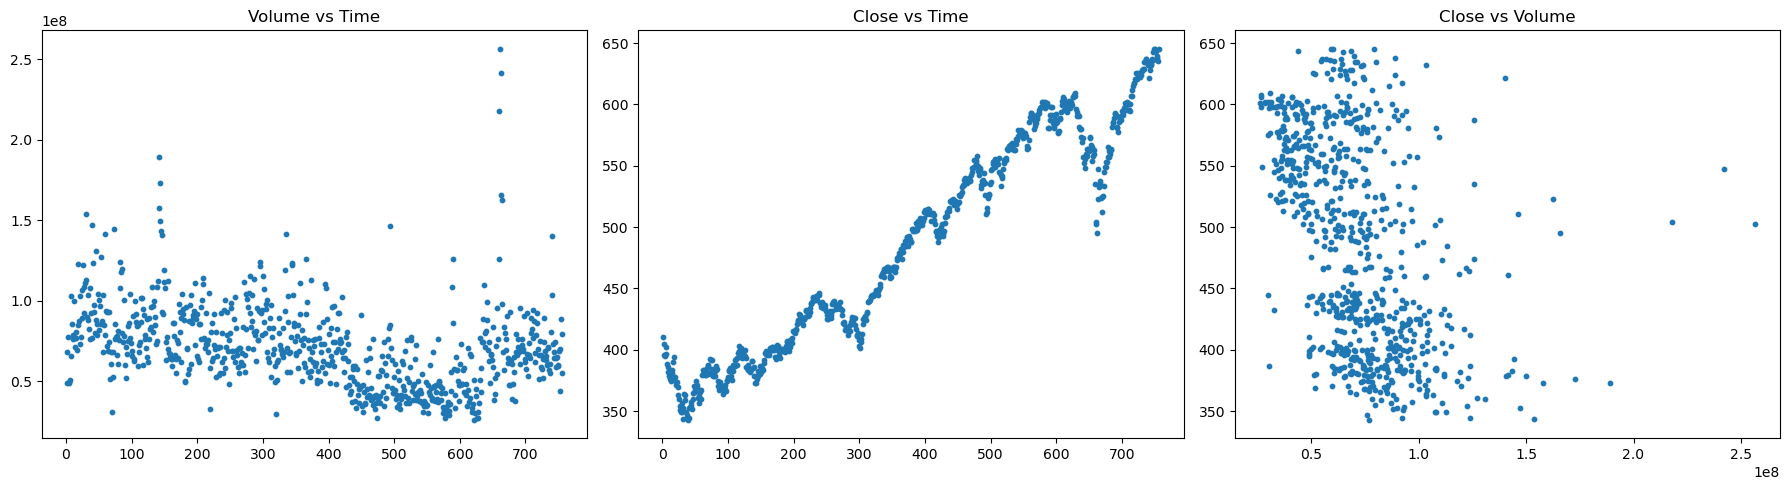

In [24]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.scatter(df['days_sequence'], df['volume'], s=10)
plt.title('Volume vs Time')

plt.subplot(1, 3, 2)
plt.scatter(df['days_sequence'], df['close'], s=10)
plt.title('Close vs Time')

plt.subplot(1, 3, 3)
plt.scatter(df['volume'], df['close'], s=10)
plt.title('Close vs Volume')

plt.tight_layout()
plt.show()
